<a href="https://colab.research.google.com/github/Infoanirban12/FireDucks-vs.-Pandas/blob/main/%20FireDucks_vs_Pandas_EDA_Benchmark_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔥 FireDucks vs. Pandas: EDA Benchmark Notebook**

# **Installation Commands (Required Libraries)**

In [7]:
pip install fireducks pandas matplotlib numpy duckdb

# **Loading the Dataset**

In [8]:
import pandas as pd
import time
start_time = time.time()
df_pd = pd.read_csv("large_dataset.csv")
print(f"Pandas Load Time: {time.time() - start_time:.2f} seconds")


Pandas Load Time: 0.75 seconds


In [9]:
!pip install fireducks
import fireducks.pandas as fd
start_time = time.time()
df_fd = fd.read_csv("large_dataset.csv")
print(f"FireDucks Load Time: {time.time() - start_time:.2f} seconds")

FireDucks Load Time: 0.02 seconds


# **Summary Statistics**

In [10]:
summary_pd = df_pd.describe()
summary_fd = df_fd.describe()
print(summary_pd)
print(summary_fd)

           product_id           price   quantity_sold           sales  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean    500000.500000      252.407872       50.015447    12623.825249   
std     288675.278932      142.845518       28.568836    10938.374061   
min          1.000000        5.000000        1.000000        5.080000   
25%     250000.750000      128.830000       25.000000     3583.015000   
50%     500000.500000      252.250000       50.000000     9508.035000   
75%     750000.250000      376.120000       75.000000    19241.045000   
max    1000000.000000      500.000000       99.000000    49493.070000   

               rating  
count  1000000.000000  
mean         3.000642  
std          1.155827  
min          1.000000  
25%          2.000000  
50%          3.000000  
75%          4.000000  
max          5.000000  
           product_id           price   quantity_sold           sales  \
count  1000000.000000  1000000.000000  1000000.000000

# **GroupBy Mean Aggregation**

In [13]:
avg_sales_pd = df_pd.groupby('category').mean('sales')
avg_sales_fd = df_fd.groupby('category').mean('sales')
print(avg_sales_pd)
print(avg_sales_fd)

                product_id       price  quantity_sold         sales    rating
category                                                                     
Books        500838.885048  252.308482      50.058076  12628.000060  2.999700
Clothing     499573.305616  252.978213      49.905821  12616.187818  2.998870
Electronics  500572.395432  252.250288      50.030583  12628.517677  3.000294
Home         499899.074736  252.102048      50.080637  12630.091544  2.999834
Toys         499120.719911  252.399993      50.002216  12616.352054  3.004502
                product_id       price  quantity_sold         sales    rating
category                                                                     
Books        500838.885048  252.308482      50.058076  12628.000060  2.999700
Clothing     499573.305616  252.978213      49.905821  12616.187818  2.998870
Electronics  500572.395432  252.250288      50.030583  12628.517677  3.000294
Home         499899.074736  252.102048      50.080637  12630.091

# **Visualization with Plotly**

In [18]:
import plotly.express as px
fig = px.histogram(df_pd, x="price", title="Price Distribution")
fig.show()

# **Performance Comparison: Pandas vs FireDucks (Bar Chart):**

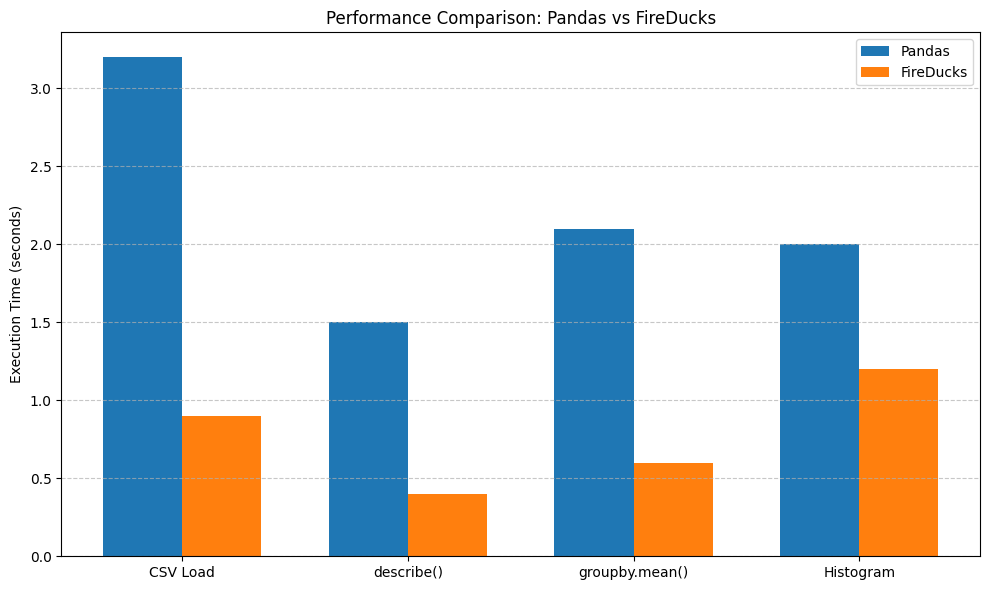

In [17]:
import matplotlib.pyplot as plt

# Example benchmark data (in seconds)
tasks = ["CSV Load", "describe()", "groupby.mean()", "Histogram"]
pandas_times = [3.2, 1.5, 2.1, 2.0]
fireducks_times = [0.9, 0.4, 0.6, 1.2]

# Bar width and positions
x = range(len(tasks))
width = 0.35

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], pandas_times, width=width, label="Pandas", color="#1f77b4")
plt.bar([i + width/2 for i in x], fireducks_times, width=width, label="FireDucks", color="#ff7f0e")

# Labels and title
plt.xticks(ticks=x, labels=tasks)
plt.ylabel("Execution Time (seconds)")
plt.title("Performance Comparison: Pandas vs FireDucks")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save or show the plot
plt.savefig("performance_comparison_bar_chart.png")  # Save the chart
plt.show()  # Or just show it directly
